# Use decision trees to prepare a model on fraud data 
## treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
import pydotplus
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz

# 1. Data Collection and description

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
df= pd.read_csv('Fraud_check.csv')

In [ ]:
df1= df.copy()

In [ ]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [ ]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
df1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [ ]:
df1.shape

(600, 6)

## Outlier Check

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


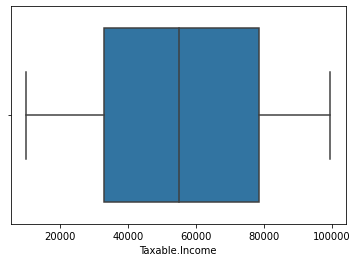

In [ ]:

ax = sns.boxplot(df1['Taxable.Income'])

## There are no outliers in the data

In [ ]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


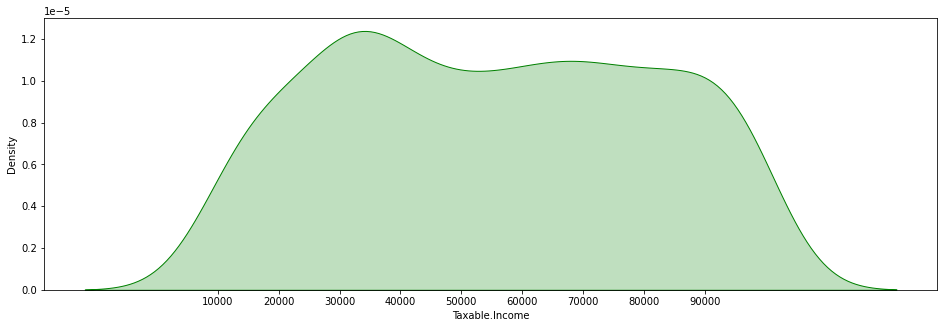

In [ ]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Taxable.Income'].skew()))
print("Kurtosis: {}".format(df1['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(df1['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

### The data is Skewed on the right & has negative Kurtosis

In [ ]:
obj_colum= df1.select_dtypes(include='object').columns.tolist()

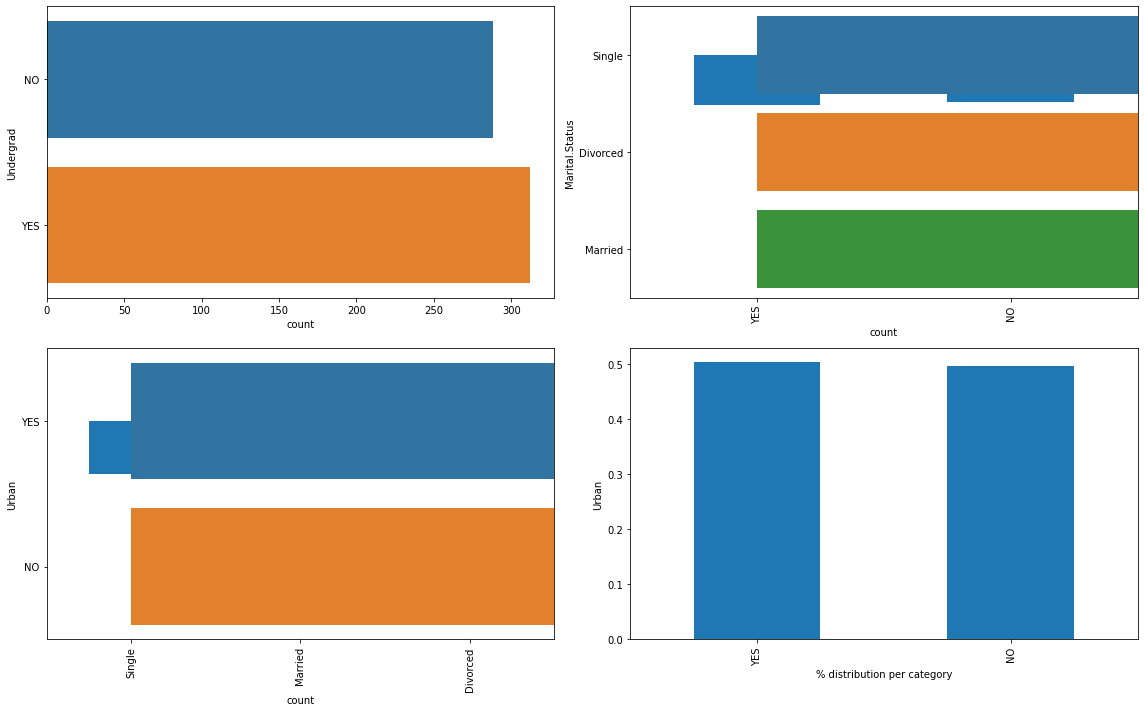

In [ ]:
plt.figure(figsize=(16,10))
for i, col in enumerate(obj_colum,1):
  plt.subplot(2,2,i)
  sns.countplot(data=df1, y=col)
  plt.subplot(2,2,i+1)
  df1[col].value_counts(normalize= True).plot.bar()
  plt.ylabel(col)
  plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [ ]:
num_columns= df1.select_dtypes(exclude= 'object').columns.tolist()

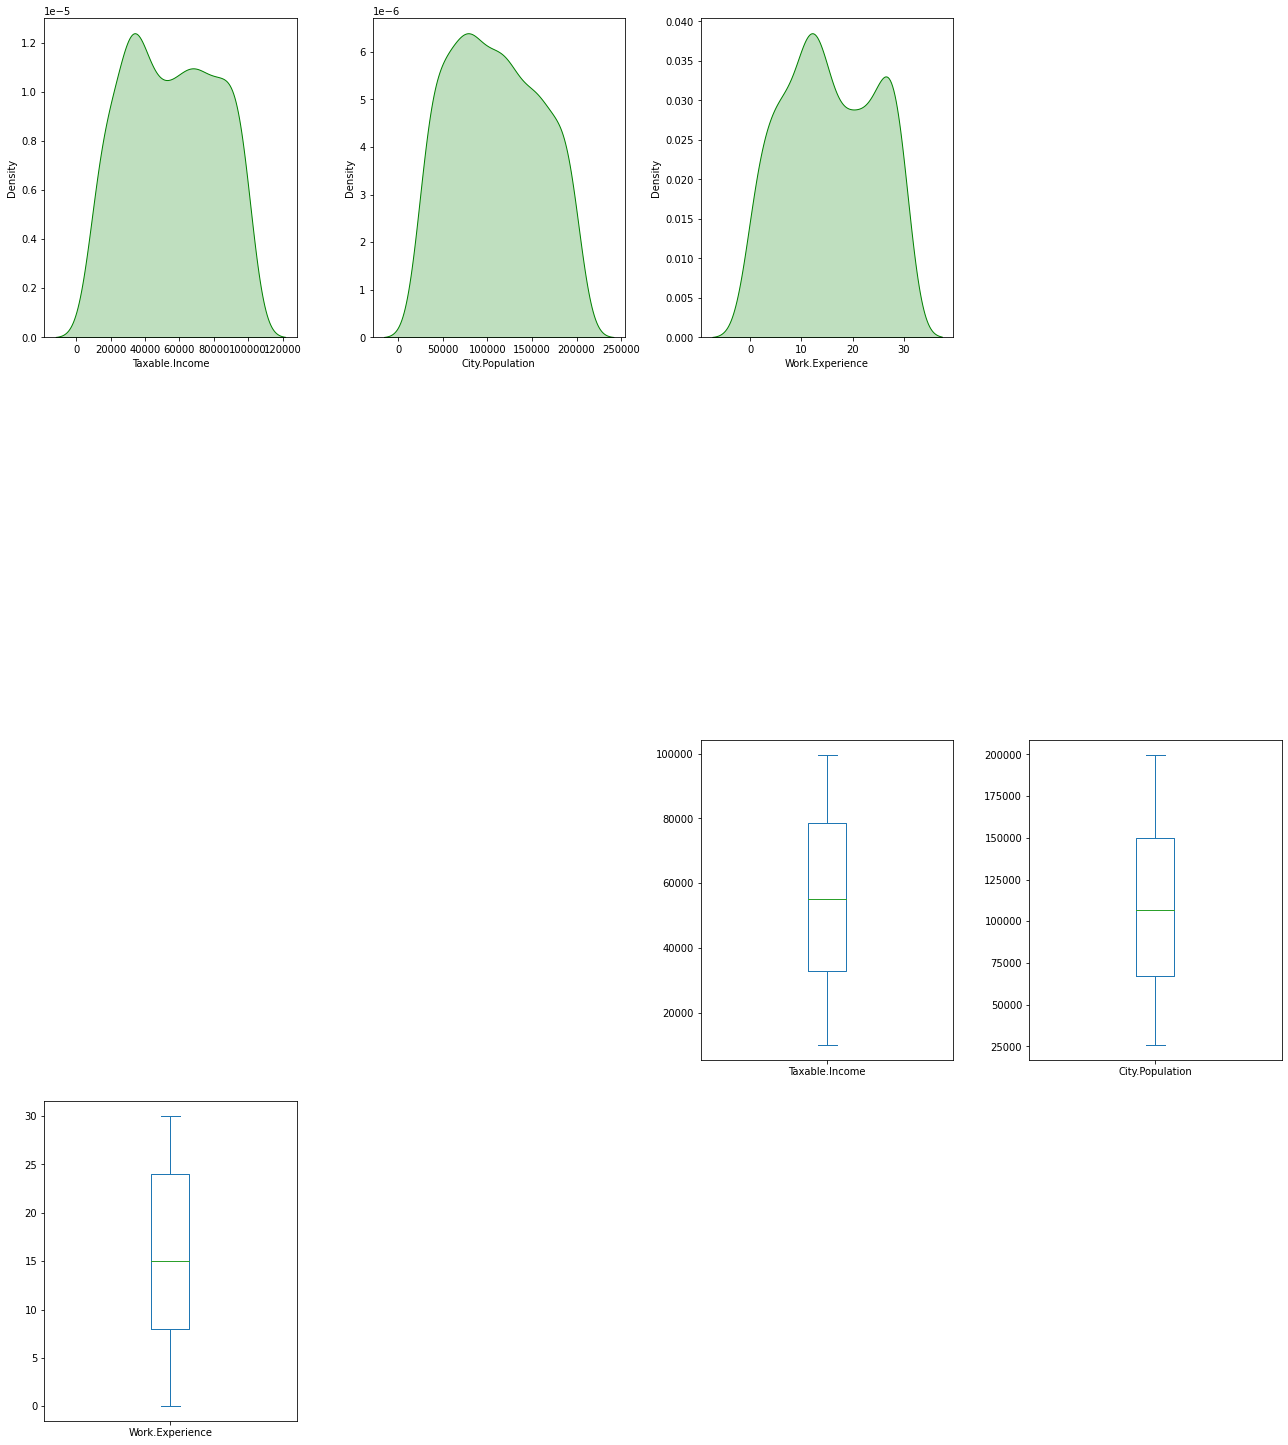

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [ ]:
plt.figure(figsize=(18,40))
for i, col in enumerate(num_columns,1):
  plt.subplot(8,4,i)
  sns.kdeplot(df[col], color='g',shade=True)
  plt.subplot(8,4,i+10)
  df[col].plot.box()
plt.tight_layout()
plt.show()
num_data= df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()], index=['skewness', 'kurtosis'])

In [ ]:
corr= df1.corr()

In [ ]:
df1 = pd.get_dummies(df1, columns = ['Undergrad','Marital.Status','Urban'])

In [ ]:
corr= df1.corr()

<AxesSubplot:>

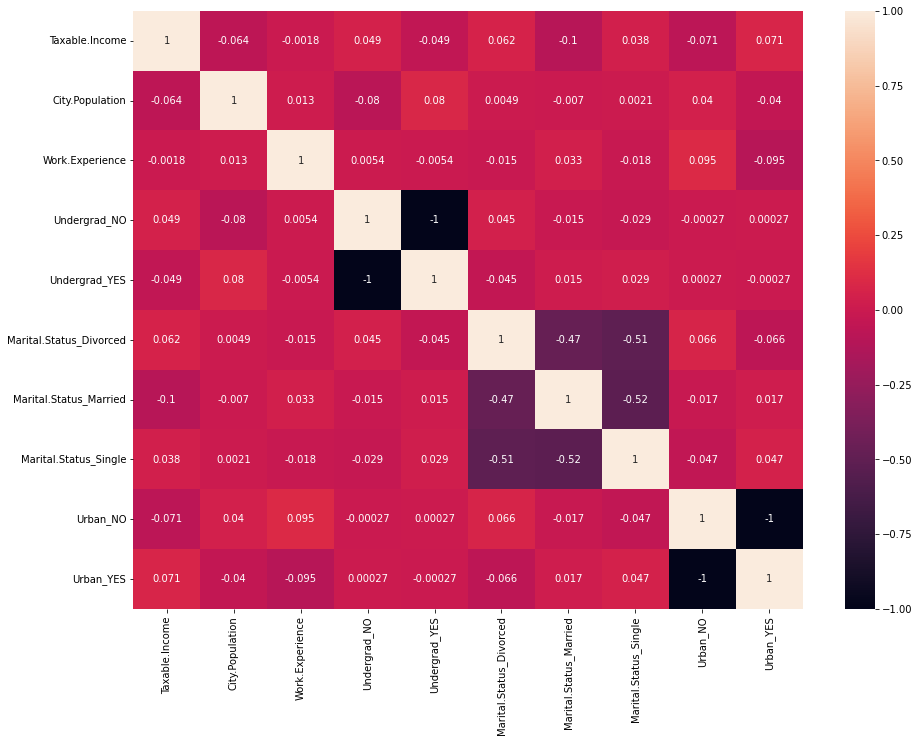

In [ ]:
plt.figure(figsize= (15,11))
sns.heatmap(corr, annot= True)

# 2. Decision Tree
## Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

In [ ]:

df1['Taxable.Income']=pd.cut(df1['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [ ]:

list(df1.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [ ]:
X = df1.iloc[:,1:10]
y = df1.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:

y_train.value_counts()

good     378
risky    102
Name: Taxable.Income, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy')

In [ ]:
pred_train= model.predict(x_train)

In [ ]:
accuracy_score(y_train, pred_train)

1.0

In [ ]:
confusion_matrix(y_train, pred_train)

array([[378,   0],
       [  0, 102]])

In [ ]:
pred_test= model.predict(x_test)

In [ ]:
accuracy_score(y_test, pred_test)

0.6583333333333333

In [ ]:
confusion_matrix(y_test, pred_test)

array([[76, 22],
       [19,  3]])

In [ ]:
df_t= pd.DataFrame({'Actual' : y_test, 'Predicted': pred_test})

In [ ]:
df_t

,Actual,Predicted
298,good,good
382,good,good
507,good,good
304,good,good
407,good,good
...,...,...
5,good,good
159,good,good
368,good,risky
293,good,good


In [ ]:
cols= list(df1.columns)

In [ ]:
predictors= cols[0:9]
target= cols[0]

In [ ]:
dot_data = StringIO()

In [ ]:
export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [ ]:
graph.write_png('fraud_full.png')

True

# Conclusion
'''Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 65%
As seen in the confusion matrix of Test data 79 instances are presdected correctly and 41 instances are not'''

In [ ]:
img = mpimg.imread('fraud_full.png') 

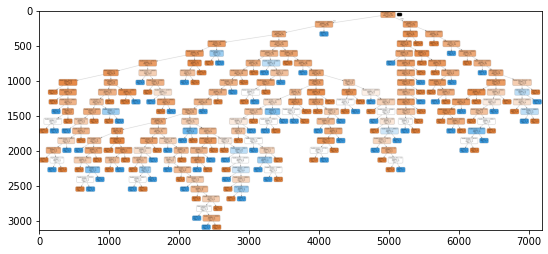

In [ ]:
plt.imshow(img)

In [ ]:
model.feature_importances_

array([0.59921972, 0.21808984, 0.02750398, 0.01327467, 0.03404307,
       0.02663495, 0.01918677, 0.02043641, 0.04161058])

In [ ]:
fi= pd.DataFrame({'feature': list(x_train.columns), 'importance': model.feature_importances_}).sort_values('importance', ascending= False)

In [ ]:
fi

,feature,importance
0,City.Population,0.599220
1,Work.Experience,0.218090
8,Urban_YES,0.041611
4,Marital.Status_Divorced,0.034043
2,Undergrad_NO,0.027504
5,Marital.Status_Married,0.026635
7,Urban_NO,0.020436
6,Marital.Status_Single,0.019187
3,Undergrad_YES,0.013275


# As seen in the above table City.Population is most important feature